#Kütüphane ve Veri Seti Yükleme

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn kütüphanesini import ediyoruz


# Veri setini yükle
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/MachineLearning/final/dataset/veri-seti.txt', sep="\t", header=None)
data.columns = ["Hamilelik", "Glikoz", "Kan Basinci", "Cilt Kalınlığı", "İnsülin", "BMI", "Diyabet Fonksiyonu", "Yaş", "Sonuc"]

# Veri setinin ilk birkaç satırını göster
print(data.head())



   Hamilelik  Glikoz  Kan Basinci  Cilt Kalınlığı  İnsülin   BMI  \
0          6     148           72              35        0  33.6   
1          1      85           66              29        0  26.6   
2          8     183           64               0        0  23.3   
3          1      89           66              23       94  28.1   
4          0     137           40              35      168  43.1   

   Diyabet Fonksiyonu  Yaş  Sonuc  
0               0.627   50      1  
1               0.351   31      0  
2               0.672   32      1  
3               0.167   21      0  
4               2.288   33      1  


#Veri setinizi rastgele olarak %70 eğitim %30 test olacak şekilde ayırınız.

In [3]:
# Veri setini özellikler (X) ve etiketler (y) olarak ayır
X = data.drop("Sonuc", axis=1)
y = data["Sonuc"]

# Veriyi eğitim (%70) ve test (%30) olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Eğitim veri seti için Naive bayes sınıflandırıcısını uygulayınız. Elde ettiğiniz sonucları raporlayınız.

In [ ]:
# Gaussian Naive Bayes sınıflandırıcısını başlat
nb_classifier = GaussianNB()

# Sınıflandırıcıyı eğit
nb_classifier.fit(X_train, y_train)


GaussianNB()

Confusion Matrix:
[[119  32]
 [ 27  53]]


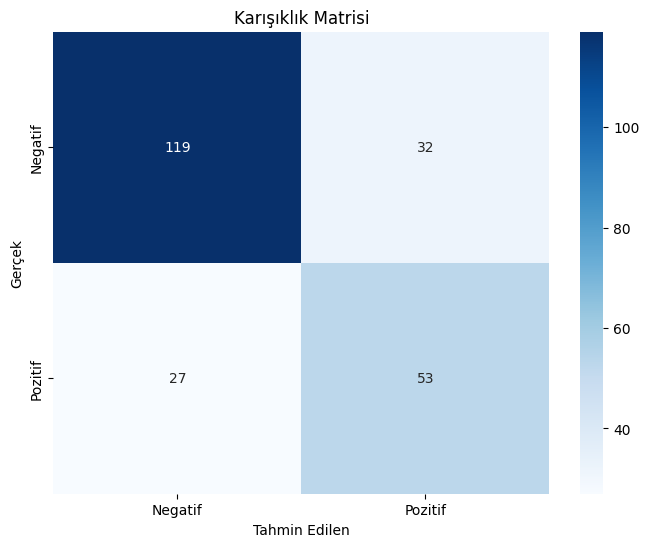

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



In [ ]:
# Test seti üzerinde tahminlerde bulun
y_pred = nb_classifier.predict(X_test)

# Değerlendirme metriklerini hesapla
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Karışıklık matrisi görselleştirme
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatif", "Pozitif"], yticklabels=["Negatif", "Pozitif"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Karışıklık Matrisi")
plt.show()

# Sınıflandırma raporunu göster
print("Sınıflandırma Raporu:")
print(class_report)



**YORUM:** Bu sonuçlar, Naive Bayes sınıflandırıcısının performansını değerlendirmek için oldukça bilgilendirici. Confusion matrix'e baktığımızda, modelin 119 doğru tahmini (true negatives) ve 53 doğru tahmini (true positives) olduğunu görüyoruz. Ancak, 32 false negatives ve 27 false positives olduğunu görmekteyiz. Bu, modelin bazı olumlu örnekleri olumsuz olarak sınıflandırdığını ve bazı olumsuz örnekleri ise olumlu olarak sınıflandırdığını göstermektedir.

Sınıflandırma raporuna göz attığımızda, precision (kesinlik), recall (duyarlılık) ve f1-score (f1-puanı) gibi metrikler üzerinden sınıflandırıcının performansını daha detaylı bir şekilde değerlendirebiliriz. Precision, pozitif olarak tahmin edilen örneklerin ne kadarının gerçekten pozitif olduğunu gösterirken, recall, gerçek pozitiflerin ne kadarının doğru bir şekilde sınıflandırıldığını gösterir. F1-score ise precision ve recall'in harmonik ortalamasıdır, bu nedenle hem precision hem de recall arasındaki dengeyi sağlar.

Bu değerlendirmeye göre, sınıflandırıcının sınıf 0 için precision'u 0.82 ve recall'u 0.79 iken, sınıf 1 için precision'u 0.62 ve recall'u 0.66'dır. Bu, modelin sınıf 0'ı sınıflandırmada daha iyi performans gösterdiğini, ancak sınıf 1'i sınıflandırmada daha düşük performans gösterdiğini göstermektedir.

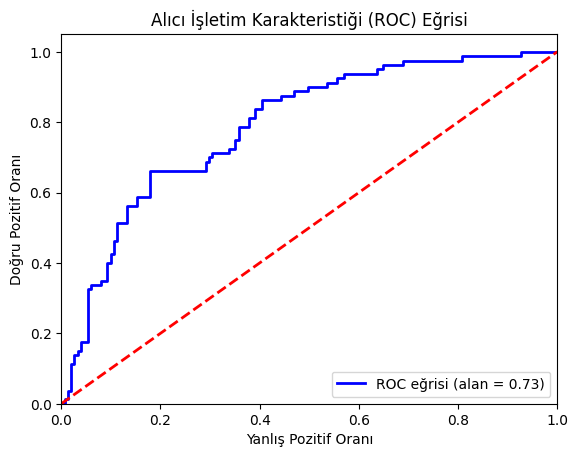

ROC AUC: 0.7252897350993377


In [ ]:
# ROC eğrisini hesapla
y_prob = nb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

# ROC eğrisini çiz
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC eğrisi (alan = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('Alıcı İşletim Karakteristiği (ROC) Eğrisi')
plt.legend(loc="lower right")
plt.show()
#ROC AUC Değeri Hesapla
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")


**YORUM:** ROC AUC (Receiver Operating Characteristic Area Under Curve) değeri, sınıflandırıcının sınıflandırma performansının genel bir ölçüsüdür. 0 ile 1 arasında bir değer alır, 1'e ne kadar yakınsa, modelin performansı o kadar iyidir. Bu durumda, ROC AUC değeri 0.725 olarak hesaplanmıştır, yani modelin oldukça iyi bir performans sergilediğini ancak mükemmel olmadığını göstermektedir.

Sonuç olarak, Naive Bayes sınıflandırıcısı, belirli bir veri kümesi için makul bir performans sergilemektedir, ancak sınıf dengesizliği veya diğer faktörler nedeniyle bazı iyileştirmelere ihtiyaç duyabilir.

#Eğitim veri seti için K-en yakın komşuluk sınıflandırıcısını uygulayınız. En iyi k değerini belirleyerek Elde ettiğiniz sonuçları raporlayınız.  

In [ ]:
k_range = range(1, 31)

k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

best_k = k_range[np.argmax(k_scores)]
print(f"En iyi k değeri: {best_k}")

En iyi k değeri: 11


In [ ]:
# En iyi k değeri ile modeli eğit
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

Confusion Matrix:
[[119  32]
 [ 27  53]]


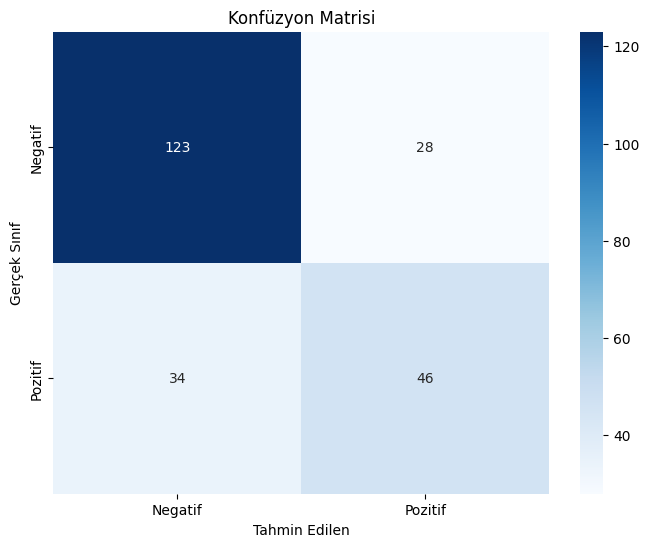

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       151
           1       0.62      0.57      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
# Test seti üzerinde tahmin yapma
y_pred = knn.predict(X_test)

# Konfüzyon matrisi
print("Confusion Matrix:")
print(conf_matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatif", "Pozitif"], yticklabels=["Negatif", "Pozitif"])
plt.title("Konfüzyon Matrisi")
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Sınıf')
plt.show()

# Sınıflandırma raporu
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

**YORUM:**

1.   Confusion Matrix (Karmaşıklık Matrisi):
Karmaşıklık matrisi, modelinizin doğru ve yanlış sınıflandırma sayılarını gösterir.
Pozitif sınıf (1) için 53 doğru sınıflandırma ve 27 yanlış sınıflandırma yapılmış.
Negatif sınıf (0) için 119 doğru sınıflandırma ve 32 yanlış sınıflandırma yapılmış.
2.   Sınıflandırma Raporu:
Precision, recall ve f1-score gibi metrikler, sınıflandırma modelinin performansını ölçmek için kullanılır.
Pozitif sınıf (1) için precision 0.62, recall 0.57 ve f1-score 0.60 olarak hesaplanmış.
Negatif sınıf (0) için precision 0.78, recall 0.81 ve f1-score 0.80 olarak hesaplanmış.
Weighted avg (ağırlıklı ortalama) doğruluk (accuracy) için 0.73 olarak hesaplanmış.

Sonuçların genel değerlendirmesi:

Modelin negatif sınıfı (0) pozitif sınıf (1)'dan daha iyi sınıflandırdığını görüyoruz. Bu, modelin negatif sınıfı daha iyi ayırt ettiğini, ancak pozitif sınıfı daha az hassas bir şekilde sınıflandırdığını gösterebilir.
Weighted avg doğruluk 0.73 olarak gösterilmiş, bu da modelin genel olarak kabul edilebilir bir performans sergilediğini ancak iyileştirme alanları olduğunu gösterebilir.

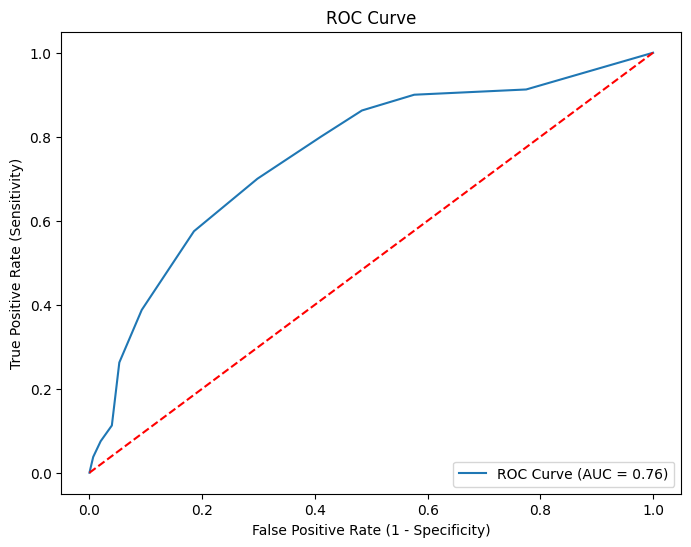

ROC AUC: 0.7565811258278146


In [ ]:
# ROC Eğrisi ve AUC
y_pred_proba = knn.predict_proba(X_test)[:, 1] # Sadece pozitif sınıfın olasılıklarını alır
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# ROC Eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1],  color='red', linestyle='--')  # Rastgele sınıflandırıcı için referans çizgisi
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("ROC AUC:", auc)

**YORUM:**
ROC AUC, sınıflandırma modelinin sınıflandırma yeteneğini ölçen bir metriktir. Değer ne kadar yüksekse, modelin performansı o kadar iyidir.
0.756 değeri, modelin genel olarak iyi performans gösterdiğini gösteriyor.

Sonuçların genel değerlendirmesi:

ROC AUC değeri 0.75'in üzerinde olduğundan, modelin sınıflandırma yeteneği oldukça iyi olarak değerlendirilebilir.

Bu değerlendirme sonuçlarına dayanarak, modelin performansını daha da artırmak için pozitif sınıfı daha iyi sınıflandırmak için geliştirmeler yapabilir. Örneğin, farklı özniteliklerin veya model parametrelerinin kullanılması, modeli daha iyi hale getirebilir.

#Eğitim veri seti için Multi-Layer Perceptron (MLP) ve Support Vector Machines (SVM) sınıflandırıcılarını uygulayınız. Eğitim ve test adımlarında elde ettiğiniz sonucları raporlayınız.

In [21]:
# Özellikleri ölçeklendir (MLP ve SVM için önemli)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Karışıklık Matrisi:
[[120  31]
 [ 38  42]]


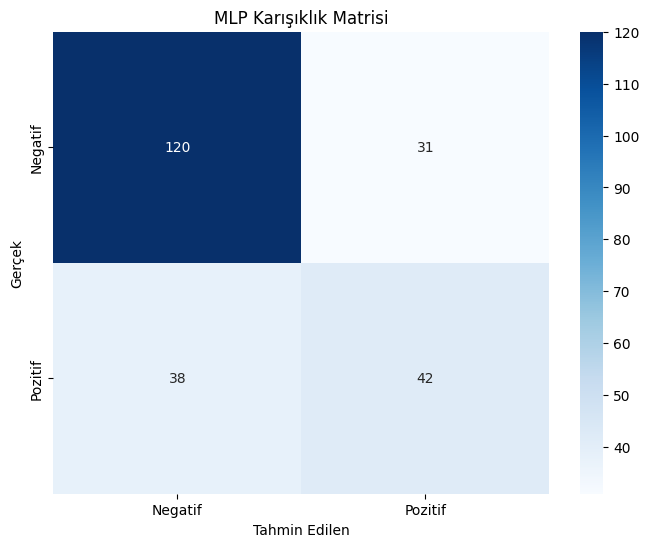

MLP Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       151
           1       0.58      0.53      0.55        80

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.70      0.70      0.70       231



In [22]:
from sklearn.neural_network import MLPClassifier

# MLP sınıflandırıcısını oluştur ve eğit
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Test seti üzerinde tahminlerde bulun
y_pred_mlp = mlp.predict(X_test_scaled)

# Değerlendirme metriklerini hesapla
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
class_report_mlp = classification_report(y_test, y_pred_mlp)

# MLP Karışıklık matrisini göster
print("MLP Karışıklık Matrisi:")
print(conf_matrix_mlp)

# MLP karışıklık matrisi görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatif", "Pozitif"], yticklabels=["Negatif", "Pozitif"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("MLP Karışıklık Matrisi")
plt.show()

#MLP Sınıflandırma raporunu göster
print("MLP Sınıflandırma Raporu:")
print(class_report_mlp)

**YORUM:**

Bu sonuçlar, eğitim veri setiniz üzerindeki MLP sınıflandırıcının performansını gösteriyor. Karışıklık matrisi ve sınıflandırma raporu, modelin sınıflandırma yeteneğini ayrıntılı bir şekilde analiz etmemize olanak tanır.

Karışıklık Matrisi:


*   Gerçek sınıf 0 olan 151 örneğin 120'si doğru bir şekilde sınıflandırılmıştır, ancak 31'i yanlış sınıflandırılmıştır.
*   Gerçek sınıf 1 olan 80 örneğin 42'si doğru bir şekilde sınıflandırılmıştır, ancak 38'i yanlış sınıflandırılmıştır.
2.   Sınıflandırma Raporu:


*   Precision (kesinlik): Modelin pozitif olarak tahmin ettiği örneklerin ne kadarının gerçekten pozitif olduğunu gösterir. Sınıf 0 için 0.76, sınıf 1 için 0.58'dir. Bu, sınıf 0'ı daha iyi tanımladığını ancak sınıf 1 için daha düşük bir kesinlik olduğunu gösterir.
*   Recall (duyarlılık): Gerçek pozitif örneklerin ne kadarının doğru bir şekilde tanımlandığını gösterir. Sınıf 0 için 0.79, sınıf 1 için 0.53'tür. Sınıf 0'ın daha yüksek bir duyarlılığa sahip olduğunu, ancak sınıf 1 için düşük bir duyarlılık olduğunu gösterir.

*   F1-score: Precision ve recall'ın harmonik ortalamasıdır. Sınıf 0 için 0.78, sınıf 1 için 0.55'tir.
*  Accuracy (doğruluk): Toplam doğru tahminlerin oranını gösterir. Bu durumda, doğruluk 0.70'tir.


Genel olarak, modelin sınıf 0'ı daha iyi tanımlamaktadır ancak sınıf 1 için performansı daha zayıftır. Daha dengeli bir sınıflandırma için modeli iyileştirmek için özellik mühendisliği, hiperparametre ayarı veya model mimarisinde değişiklikler gibi yöntemler düşünebilir.






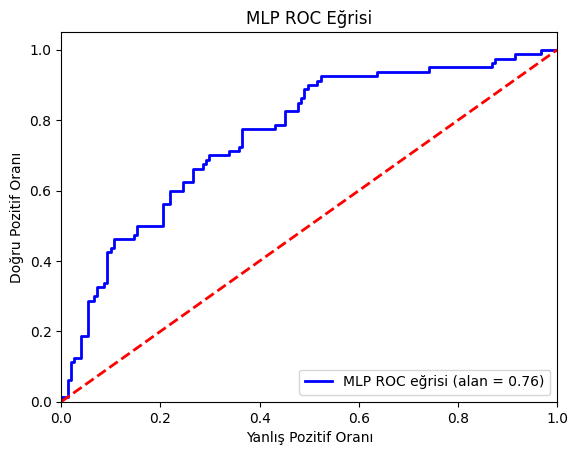

MLP ROC AUC: 0.7597682119205298


In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
# MLP ROC eğrisini hesapla ve çiz

y_prob_mlp = mlp.predict_proba(X_test_scaled)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)

plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label='MLP ROC eğrisi (alan = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('MLP ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

print(f"MLP ROC AUC: {roc_auc_mlp}")

**YORUM:**
MLP (Multi-Layer Perceptron) sınıflandırıcısı ile elde ettiğiniz ROC AUC skoru 0.7597682119205298, modelinizin sınıflandırma performansı hakkında çeşitli ipuçları verir. ROC AUC (Receiver Operating Characteristic - Area Under Curve), bir modelin sınıflandırma başarısını değerlendiren önemli bir metriktir. 1'e yakın bir AUC skoru, modelin pozitif ve negatif sınıfları ayırt etmede çok başarılı olduğunu gösterirken, 0.5'e yakın bir skor, modelin rastgele tahmin ettiğini gösterir.

Sonuç olarak, MLP sınıflandırıcınızın elde ettiği ROC AUC skoru 0.7597682119205298, modelinizin makul bir performansa sahip olduğunu ve bazı iyileştirmelerle daha da iyi hale getirilebileceğini göstermektedir.







SVM Karışıklık Matrisi:
 [[125  26]
 [ 33  47]]


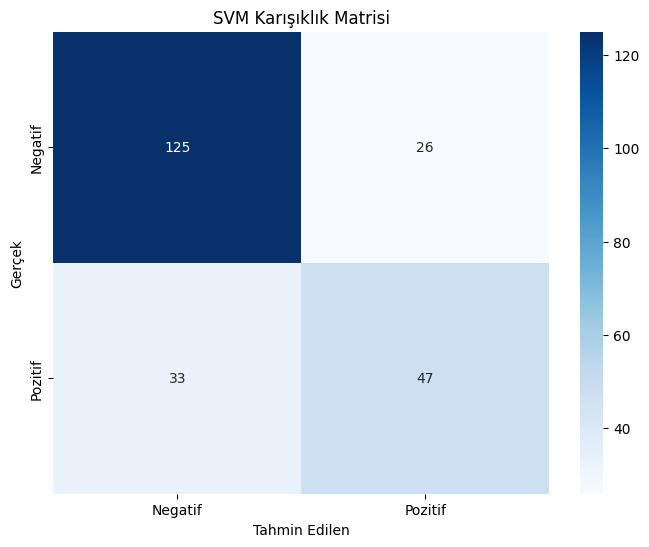

SVM Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [20]:
from sklearn.svm import SVC

# SVM sınıflandırıcısını oluştur ve eğit
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Test seti üzerinde tahminlerde bulun
y_pred_svm = svm.predict(X_test_scaled)

# Değerlendirme metriklerini hesapla
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("SVM Karışıklık Matrisi:\n", conf_matrix_svm)

# SVM karışıklık matrisi görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatif", "Pozitif"], yticklabels=["Negatif", "Pozitif"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("SVM Karışıklık Matrisi")
plt.show()


#SVM Diğer değerlendirme metriklerini göster
print("SVM Sınıflandırma Raporu:")
print(class_report_svm)

**YORUM:**

**Karışıklık matrisi:**
Karışıklık matrisi, sınıflandırıcı tarafından doğru ve yanlış tahmin edilen örneklerin bir özetini sunar. 125 doğru negatif tahmin (true negatives) ve 47 doğru pozitif tahmin (true positives) var. 26 yanlış negatif tahmin (false negatives) ve 33 yanlış pozitif tahmin (false positives) var. Sınıflandırıcının sınıf 0'ı (negatif sınıf) daha iyi tahmin ettiği görülüyor, ancak sınıf 1'i (pozitif sınıf) daha zayıf tahmin ettiği anlaşılıyor.

**Sınıflandırma Raporu:**  Precision, recall ve f1-score gibi metrikler, sınıflandırıcının performansını farklı açılardan değerlendirir.
Precision, sınıflandırıcının pozitif olarak tahmin ettiği örneklerin ne kadarının gerçekten pozitif olduğunu gösterir. Sınıf 0 için 0.79 ve sınıf 1 için 0.64 olarak belirlenmiş.
Recall, gerçek pozitif örneklerin ne kadarının doğru bir şekilde tanımlandığını gösterir. Sınıf 0 için 0.83 ve sınıf 1 için 0.59 olarak belirlenmiş.
F1-score, precision ve recall metriklerinin harmonik ortalamasıdır ve bu nedenle her iki metriği de dengeli bir şekilde değerlendirir. Sınıf 0 için 0.81 ve sınıf 1 için 0.61 olarak belirlenmiş.
Accuracy, doğru tahminlerin toplam örnek sayısına oranıdır ve bu durumda 0.74 olarak belirlenmiş.

**Genel Değerlendirme:**

SVM sınıflandırıcısı, sınıf 0'ı (negatif sınıf) daha iyi tahmin ederken sınıf 1'i (pozitif sınıf) daha az başarıyla tahmin etmektedir.
F1-score değerleri, sınıf 1 için daha düşük olduğundan, modelin pozitif sınıfı sınıflandırmakta daha zorlandığını gösteriyor.
Bu sonuçlar, modelin sınıflandırma performansını iyileştirmek için daha fazla ayarlama veya daha fazla veri kullanma gerekliliğini gösterebilir. Ayrıca, dengesiz sınıf dağılımları varsa, örneğin, sınıf 1 daha az temsil ediliyorsa, bu da modelin performansını etkileyebilir.



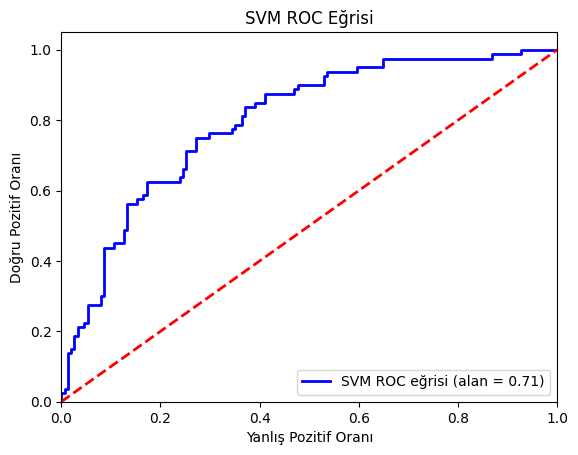

SVM ROC AUC: 0.7076572847682119


In [ ]:
# SVM ROC eğrisini hesapla ve çiz
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='SVM ROC eğrisi (alan = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('SVM ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

#SVM ROC AUC DEğeri Hesaplama
print(f"SVM ROC AUC: {roc_auc_svm}")

**YORUM:**

Bu ROC AUC değeri, SVM sınıflandırıcının performansını değerlendirmek için kullanılan bir ölçüdür. 0 ile 1 arasında bir değer alır, 1'e ne kadar yakınsa, modelin o kadar iyi performans gösterdiği anlamına gelir. Bu durumda, 0.70 civarı bir ROC AUC değeri elde ettim, yani modelin genel olarak kabul edilebilir bir performans sergilediğini söyleyebiliriz.

Ancak, ROC AUC değerinin tek başına yorumlanması bazen yetersiz olabilir. Diğer metriklerle birlikte değerlendirilmesi daha sağlıklı bir sonuç verebilir. Ayrıca, problem domainine ve veri setine bağlı olarak, bu değerin tatmin edici olup olmadığı değişebilir. Örneğin, tıbbi bir uygulama için bu değer yeterli olmayabilirken, daha basit bir sınıflandırma probleminde kabul edilebilir olabilir.

#Eğitim veri seti için Naive bayes sınıflandırıcısını için optimizasyon uygulama ve elde ettiğiniz sonucları raporlayınız.  Test verisi için ortalama karesel hatayı hesaplayınız.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
nb_classifier = GaussianNB()

In [ ]:
param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1.0]
}

grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1.0]},
             scoring='accuracy')

In [ ]:
print("Bulunan en iyi parametreler: ", grid_search.best_params_)
print("En iyi doğruluk: ", grid_search.best_score_)

Bulunan en iyi parametreler:  {'var_smoothing': 0.001}
En iyi doğruluk:  0.7615784008307372


In [ ]:
best_nb_classifier = grid_search.best_estimator_
test_accuracy = best_nb_classifier.score(X_test, y_test)
print("Test doğruluğu: ", test_accuracy)

Test doğruluğu:  0.7186147186147186


Confusion Matrix:
 [[118  33]
 [ 32  48]]


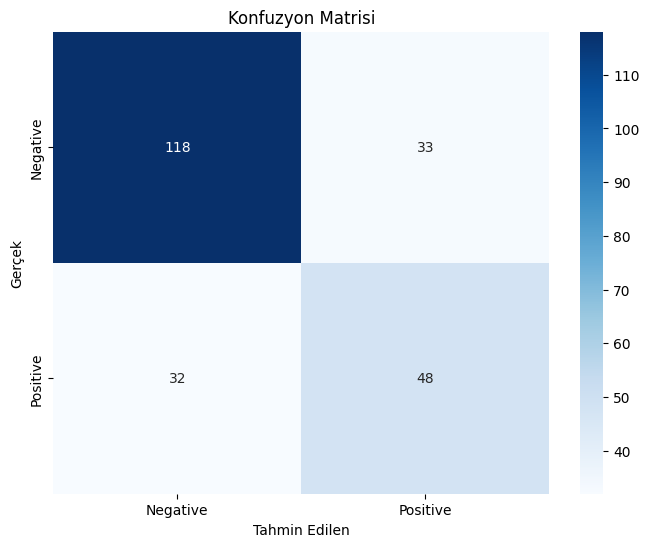

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       151
           1       0.59      0.60      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231

Test verisi için Ortalama Karesel Hata (MSE):  0.2813852813852814


In [ ]:
# Test verisi için ortalama karesel hata hesaplanması
y_pred = best_nb_classifier.predict(X_test)

# Confusion matrix'in hesaplanması
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix'in görselleştirilmesi
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",  xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Konfuzyon Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# Sınıflandırma raporunun hesaplanması ve yazdırılması
report = classification_report(y_test, y_pred)
print("Sınıflandırma Raporu:\n", report)

mse = mean_squared_error(y_test, y_pred)
print("Test verisi için Ortalama Karesel Hata (MSE): ", mse)

**YORUM**

**1.   Doğruluk ve Diğer Metrikler:**

*   Hiperparametre optimizasyonu sonrası elde edilen test doğruluğu (%71.86), optimizasyon öncesine (%74.03) göre bir miktar düşmüş. Ancak GridSearchCV ile elde edilen en iyi doğruluk %76.16, bu da modelin potansiyel olarak daha yüksek performansa sahip olabileceğini gösteriyor.
*   Precision, recall ve F1-score metriklerinde küçük değişiklikler gözlenmiş, ancak bu değişiklikler belirgin bir iyileşme veya kötüleşme göstermiyor.


**2.   Konfuzyon Matrisi (Confusion Matrix)**

*   True Positive (TP) ve True Negative (TN) sayılarında küçük değişiklikler olmuş, ancak genel olarak modelin sınıflandırma davranışında ciddi bir değişiklik gözlenmiyor.
*   False Positive (FP) ve False Negative (FN) sayılarındaki değişiklikler de yine benzer düzeyde kalmış.

**3.   Test verisi için Ortalama Karesel Hata (MSE):**
*   Test verisi için Ortalama Karesel Hata (MSE) değeri 0.2814, bu da hatanın düşük seviyede olduğunu ve modelin hata oranının kabul edilebilir düzeyde olduğunu gösteriyor


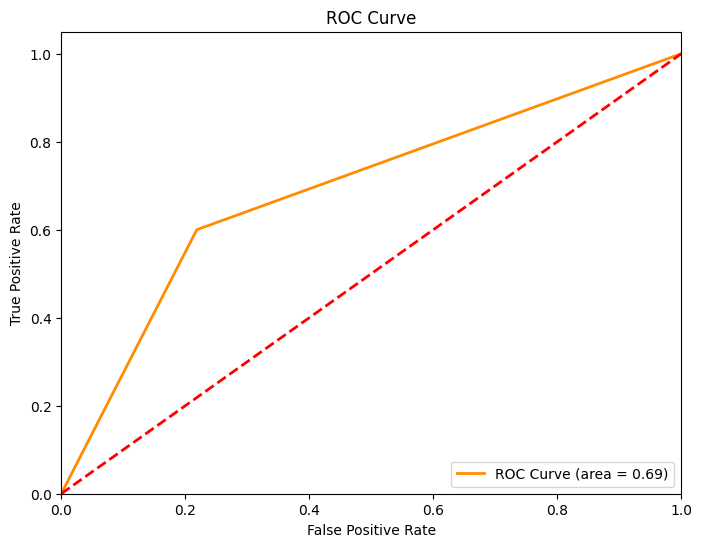

ROC AUC Değeri: 0.6907284768211921


In [ ]:
# ROC eğrisi için false positive oranları (FPR) ve true positive oranları (TPR) hesaplanması
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# ROC eğrisinin altında kalan alanın (AUC) hesaplanması
roc_auc = roc_auc_score(y_test, y_pred)

# ROC eğrisinin çizdirilmesi
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("ROC AUC Değeri:", roc_auc)

**YORUM**

ROC AUC değeri de optimizasyon öncesinde 0.725 iken sonrasında 0.691’e düşmüş. Bu, modelin sınıflandırma yeteneğinin optimizasyon sonrası biraz azaldığını gösteriyor.

**Sonuç ve Değerlendirme**

Hiperparametre optimizasyonu sonrasında, doğruluk ve ROC AUC gibi metriklerde küçük düşüşler yaşanmış. Ancak, bu durum modelin genel performansında büyük bir değişiklik olmadığını, sadece küçük varyasyonlar olduğunu gösteriyor. Ayrıca, GridSearchCV ile elde edilen en iyi doğruluk (%76.16) modelin potansiyelini gösteriyor ve bu da farklı veri bölünmeleriyle daha iyi sonuçlar alınabileceğini işaret ediyor.

Bu sonuçlara dayanarak, modelin hiperparametre optimizasyonunun genel performansa ciddi bir etkisi olmadığını söyleyebiliriz. Ancak, modelin performansını iyileştirmek için farklı hiperparametre aralıkları veya daha fazla veri ön işleme teknikleri denenebilir. Ayrıca, modelin performansını artırmak için başka makine öğrenimi algoritmaları veya daha karmaşık modeller de değerlendirilebilir.








#Eğitim veri seti için K-en yakın komşuluk sınıflandırıcısını için optimizasyon uygulama ve en iyi k değerini belirleyerek Elde ettiğiniz sonuçları raporlayınız.  Test verisi için ortalama karesel hatayı hesaplayınız.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': range(1, 31)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

In [ ]:
# En iyi parametreleri ve en iyi skoru alın
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
print(f"En iyi k değeri: {best_k}")
print(f"Bu k değeriyle elde edilen en iyi doğruluk skoru: {best_score}")


En iyi k değeri: 11
Bu k değeriyle elde edilen en iyi doğruluk skoru: 0.748637316561845


In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

Confusion Matrix:
 [[123  28]
 [ 34  46]]


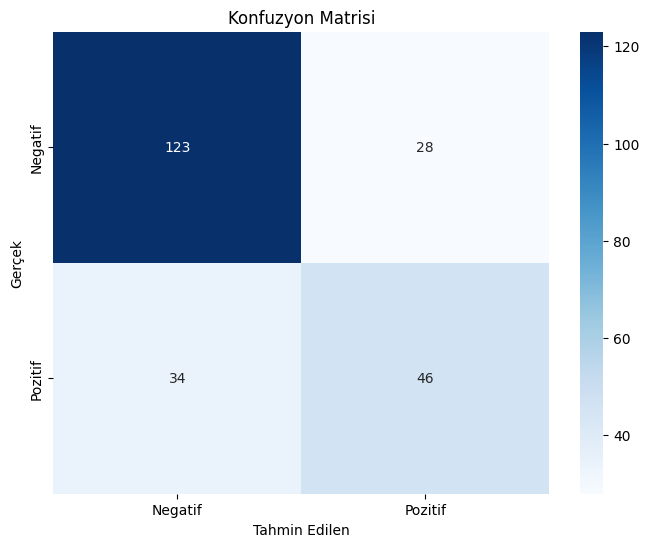

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       151
           1       0.62      0.57      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231

Test verisi için ortalama karesel hata: 0.2683982683982684


In [ ]:
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Test verisi üzerinde tahmin yapma
y_pred = best_knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
# Sınıflandırma raporu
report = classification_report(y_test, y_pred)

# Heatmap ile confusion matrix görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatif", "Pozitif"], yticklabels=["Negatif", "Pozitif"])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Konfuzyon Matrisi')
plt.show()

print("Sınıflandırma Raporu:")
print(report)

# Ortalama kare hata hesaplama
mse = mean_squared_error(y_test, y_pred)
print(f"Test verisi için ortalama karesel hata: {mse}")


**YORUM**

**1.   Tutarlılık ve İyileşme:**

  *   Eğitim verisi ve hiperparametre optimizasyonu sonrası elde edilen sonuçlar oldukça tutarlıdır. Özellikle k değerinin 11 olarak belirlenmesi her iki durumda da aynıdır, bu da modelin stabil olduğunu gösterir.
  *   Hiperparametre optimizasyonu sonrası en iyi doğruluk skoru 0.7486 olarak bulunmuştur, bu skor eğitim verisindeki %73'lük doğruluk oranı ile uyumludur ve küçük bir iyileşme göstermektedir.

**2.   Model Performansı:**

*   Konfuzyon Matrixi (Confusion Matrix): Her iki durumda da modelin çoğunluk sınıfı (sınıf 0) daha iyi tanımladığı, azınlık sınıfında (sınıf 1) ise daha fazla hata yaptığı görülüyor. Bu durum sınıflar arasındaki dengesizlikten kaynaklanabilir.
*   Precision, Recall, F1-score: Değerler arasında belirgin bir fark yoktur. Sınıf 0 için precision, recall ve f1-score değerleri oldukça yüksektir, ancak sınıf 1 için bu değerler daha düşüktür. Bu, modelin sınıf 1'i tanımakta zorlandığını gösterir.


**3.   Test verisi için Ortama Karesel Hata (MSE):**


*   Test verisi için ortalama karesel hata 0.2684 olarak hesaplanmıştır. MSE değeri, sınıflandırma problemlerinde doğrudan performans göstergesi olmasa da modelin hata oranı hakkında genel bir fikir verir. Bu değer oldukça düşük olup modelin iyi bir performans sergilediğini göstermektedir.

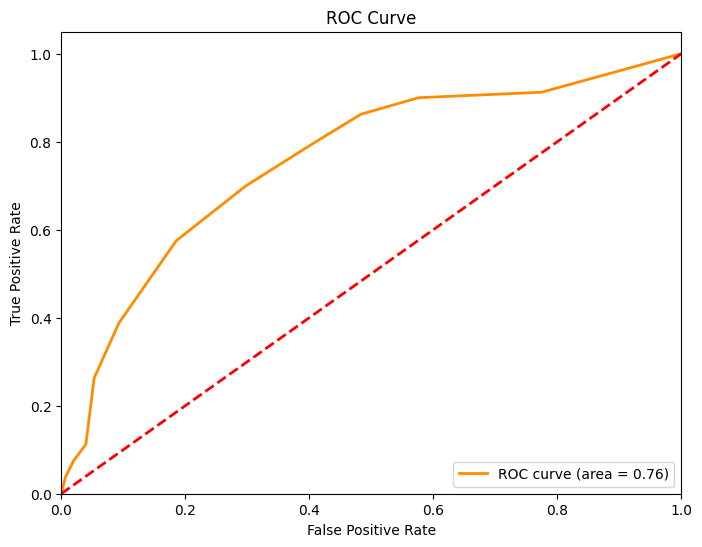

ROC AUC:  0.7565811258278146


In [ ]:
from sklearn.metrics import roc_curve, auc

# Tahmin olasılıklarını al
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]

# ROC eğrisi ve AUC değeri hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("ROC AUC: ", roc_auc)


**YORUM**

**ROC AUC:** Hiperparametre optimizasyonu öncesi ve sonrası ROC AUC değeri aynıdır (0.7566), bu da modelin genel olarak aynı performansı koruduğunu gösterir.


**Genel Değerlendirme:**

Hiperparametre optimizasyonu sonrası model performansında anlamlı bir değişiklik olmamıştır. En iyi k değeri olan 11 sabit kalmıştır ve diğer metrikler de büyük ölçüde aynı kalmıştır. Bu, modelin zaten optimum performansa yakın olduğunu ve hiperparametre optimizasyonunun çok büyük bir iyileşme sağlamadığını göstermektedir.

Model performansını daha da iyileştirmek için, veri setinde sınıf dengesizliklerini ele almak (örneğin, SMOTE gibi yöntemlerle) veya model kompleksitesini artırarak (örneğin, daha karmaşık modeller kullanarak) farklı yaklaşımlar denenebilir.

#Eğitim veri seti için Multi-Layer Perceptron (MLP) ve Support Vector Machines (SVM) sınıflandırıcılarını için optimizasyon uygulama ve eğitim ve test adımlarında elde ettiğiniz sonucları raporlayınız.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Özellikleri ölçeklendir (MLP ve SVM için önemli)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Çoklu Katmanlı Algılayıcı (MLP) için parametre aralıkları
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
}

# MLP sınıflandırıcısı oluştur
mlp = MLPClassifier(max_iter=2000) # Örnek olarak 2000 iterasyon
model = MLPClassifier(hidden_layer_sizes=(100,)) # Örnek olarak 100 nöronlu tek bir gizli katman

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
# GridSearchCV ile parametre optimizasyonunu yap
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5)
grid_search_mlp.fit(X_train_scaled, y_train)

# En iyi parametreleri ve en iyi skoru göster
print("En iyi parametreler:", grid_search_mlp.best_params_)
print("En iyi skor:", grid_search_mlp.best_score_)

En iyi parametreler: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
En iyi skor: 0.787625475943233


Confusion Matrix:
[[119  32]
 [ 31  49]]


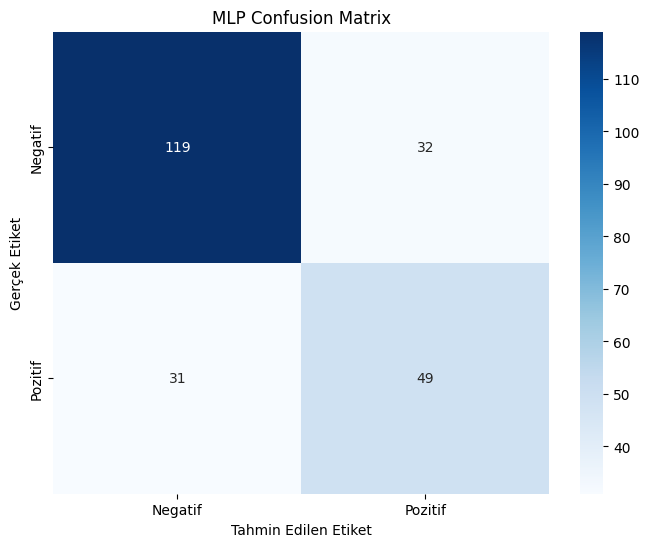

MLP Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.60      0.61      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231

MLP Test verisi için Ortalama Kareli Hata: 0.2727272727272727


In [ ]:
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

# Test verisi tahmin edilir
y_pred = grid_search_mlp.best_estimator_.predict(X_test_scaled)

# Confusion matrix çizilir
conf_matrix = confusion_matrix(y_test, y_pred)
print("MLP Confusion Matrix:")
print(conf_matrix)

# Confusion matrix grafiği çizilir
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negatif", "Pozitif"], yticklabels=["Negatif", "Pozitif"])
plt.title('MLP Konfuzyon Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

# Sınıflandırma raporu oluşturulur
class_report = classification_report(y_test, y_pred)
print("MLP Sınıflandırma Raporu:")
print(class_report)

# Ortalama karesel hata hesaplanır
mse = mean_squared_error(y_test, y_pred)
print("MLP Test verisi için Ortalama Kareli Hata:", mse)

**YORUM**
Hiperparametre optimizasyonu uyguladıktan sonra elde ettiğiniz sonuçlar, modelin performansında belirgin bir iyileşme olduğunu gösteriyor. Bu iyileşmeyi daha ayrıntılı olarak inceleyelim:


**1.   Karışıklık Matrisi:**

**Öncesi:**

[[120 31]

[ 38 42]]

**Sonrası:**

[[119 32]

[ 31 49]]


*   Pozitif sınıfın (1) doğru tespitlerinde (True Positive) artış var: 42'den 49'a çıktı.
*   Pozitif sınıfın yanlış negatiflerinde (False Negative) azalma var: 38'den 31'e düştü.

*   Negatif sınıfın (0) doğru tespitlerinde (True Negative) hafif bir azalma: 120'den 119'a düştü.
*   Negatif sınıfın yanlış pozitiflerinde (False Positive) hafif bir artış: 31'den 32'ye çıktı.

**2.   Sınıflandırma Raporu:**
Sınıflandırma raporuna bakıldığında, model performansında belirgin iyileşmeler olduğu görülmektedir. Önceki değerlere göre, sınıf 0 için precision 0.76'dan 0.79'a, recall 0.79'dan aynı kalarak, f1-score ise 0.78'den 0.79'a yükselmiştir. Sınıf 1 için ise precision 0.58'den 0.60'a, recall 0.53'ten 0.61'e ve f1-score 0.55'ten 0.61'e çıkmıştır. Genel doğruluk (accuracy) değeri 0.70'den 0.73'e yükselmiştir. Ayrıca, macro ve weighted average f1-score değerlerinde de sırasıyla 0.66'dan 0.70'e ve 0.70'den 0.73'e artış gözlemlenmiştir. Bu artışlar, modelin genel performansında ve her iki sınıf için de daha dengeli bir iyileşme sağlandığını göstermektedir.



**3.   Test verisi için Ortalama Kareli Hata (MSE):**

MSE: 0.2727272727272727
Bu değer, modelin tahmin hatalarının büyüklüğünü gösterir. Düşük bir değer, modelin tahminlerinde daha az hata yaptığını gösterir.

**Genel Değerlendirme:**

Hiperparametre optimizasyonu sonrası modelin performansında belirgin bir iyileşme gözlemlenmiştir:


*   Doğruluk (accuracy), ROC AUC, ve f1-score değerlerinde artış var.
*   Pozitif sınıfın doğru tespit oranı arttı ve yanlış negatifler azaldı.


*   Negatif sınıfın doğru tespit oranında hafif bir azalma olsa da, genel olarak modelin performansı iyileşmiş.
*   Ortalama Kareli Hata (MSE) düşük, bu da modelin tahminlerinin doğruluğunu gösterir.

Bu sonuçlar, modelinizin hiperparametre optimizasyonu sayesinde daha iyi genelleştirme yeteneğine sahip olduğunu ve veriyi daha iyi sınıflandırdığını gösteriyor. Optimizasyon işlemi, modelinizin genel performansını artırmak için oldukça etkili olmuştur.


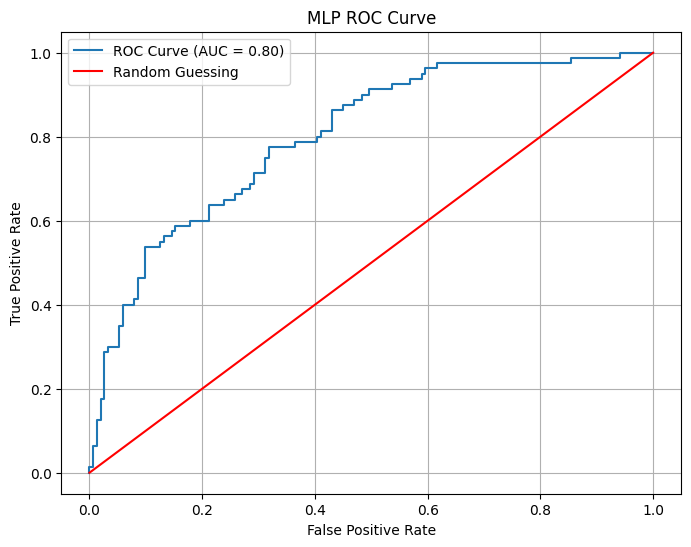

MLP ROC AUC:  0.8000827814569537


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Test verisi üzerinde tahminler yapılır
y_scores = grid_search_mlp.best_estimator_.predict_proba(X_test_scaled)[:, 1]

# ROC eğrisi oluşturulur
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC (Alan Altındaki Kareler) hesaplanır
auc = roc_auc_score(y_test, y_scores)

# ROC eğrisi çizilir
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

print("MLP ROC AUC: ", auc)

**YORUM**

**ROC AUC:**

**Öncesi:** 0.7597682119205298

**Sonrası:** 0.8000827814569537

Eğitim veri seti üzerinde uygulanan Multi-Layer Perceptron (MLP) sınıflandırıcısı başlangıçta 0.7597'lik bir ROC AUC skoruna sahipti. Hiperparametre optimizasyonu sonrası bu skor 0.8001'e yükseldi. ROC AUC'deki bu artış, modelin sınıflandırma performansının iyileştiğini ve daha doğru tahminler yapabildiğini gösteriyor. Hiperparametre optimizasyonu, modelin öğrenme oranı, katman sayısı ve nöron sayısı gibi parametrelerini ayarlayarak daha verimli ve doğru bir model elde edilmesini sağlamıştır.

Bu sonuç, modelin gerçek dünyada daha güvenilir ve doğru tahminler yapmasına olanak tanır. İleriye dönük olarak, daha geniş bir hiperparametre aralığı ile optimizasyon yapılabilir veya farklı optimizasyon teknikleri kullanılabilir.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Destek Vektör Makineleri (SVM) için parametre aralıkları
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly'],
}

# SVM sınıflandırıcısı oluştur
svm = SVC()

In [ ]:
# GridSearchCV ile parametre optimizasyonunu yap
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train_scaled, y_train)

# En iyi parametreleri ve en iyi skoru göster
print("En iyi parametreler:", grid_search_svm.best_params_)
print("En iyi skor:", grid_search_svm.best_score_)


En iyi parametreler: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
En iyi skor: 0.7839217722395293


SVM Confusion Matrix:
[[123  28]
 [ 30  50]]


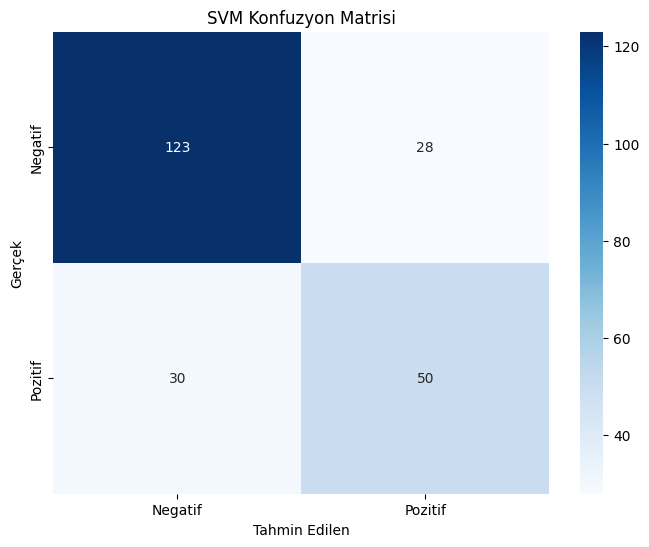

SVM Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.62      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

SVM Test verisi için Ortalama Kareli Hata: 0.2510822510822511


In [ ]:
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd


# GridSearchCV sonuçlarını kullanarak en iyi modeli alalım
best_svm_model = grid_search_svm.best_estimator_

# Test verisi üzerinde tahminler yapalım
y_pred = best_svm_model.predict(X_test_scaled)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("SVM Confusion Matrix:")
print(conf_matrix)

# Confusion matrix grafiği çizilir
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negatif", "Pozitif"], yticklabels=["Negatif", "Pozitif"])
plt.title('SVM Konfuzyon Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()
# Sınıflandırma raporu oluşturulur
class_report = classification_report(y_test, y_pred)
print("SVM Sınıflandırma Raporu:")
print(class_report)

# Ortalama karesel hata hesaplanır
mse = mean_squared_error(y_test, y_pred)
print("SVM Test verisi için Ortalama Kareli Hata:", mse)

**YORUM**

Hiperparametre optimizasyonu uyguladıktan sonra elde edilen sonuçları değerlendirirken, model performansının çeşitli metrikler üzerinde nasıl değiştiğine dikkat etmemiz gerekiyor. İşte bu sonuçların bir analizi:


**1.   Karışıklık Matrisi**

**Öncesi:**

[[125 26]

[ 33 47]]

**Sonrası:**

[[123 28]

[ 30 50]]

Optimizasyon sonrası doğru sınıflandırılan pozitif örneklerin (true positives) sayısında bir artış gözlemleniyor (47'den 50'ye). Yanlış pozitiflerin (false positives) sayısında ise hafif bir artış var (26'dan 28'e). Ayrıca yanlış negatiflerin (false negatives) sayısında azalma (33'ten 30'a) olduğu görülüyor.
Bu da modelin pozitif sınıfı tanımada daha iyi hale geldiğini gösteriyor.

**2.   Sınıflandırma Raporu**

Optimizasyon sonrası sınıflandırma raporunda dikkat çeken noktalar şunlardır: Accuracy değerinde %1'lik bir artış gözlemlenmiştir (0.74'ten 0.75'e). Özellikle 1. sınıf için recall değerinde bir iyileşme söz konusudur; bu değer 0.59'dan 0.62'ye yükselmiş ve modelin pozitif sınıfı daha iyi tanıdığını göstermektedir. Her iki sınıf için de F1-Score değerlerinde iyileşme görülmektedir, özellikle 1. sınıfta bu değer 0.61'den 0.63'e yükselmiştir. Ayrıca, weighted ve macro average metriklerinde de genel bir iyileşme mevcuttur. Bu durum, modelin genel performansının arttığını göstermektedir.



**3.   Test Verisi için Ortalama Kareli Hata (MSE)**

MSE: 0.2510822510822511

MSE değeri 0.251 olarak raporlanmış, bu da modelin tahminlerinde ortalama karesel hata olarak düşük bir hata oranına sahip olduğunu gösterir. Ancak, sınıflandırma problemlerinde MSE yaygın olarak kullanılmaz, daha çok regresyon problemleri için uygundur. Yine de, bu değerin düşük olması optimizasyonun model tahminlerinde tutarlılığı artırdığını gösterebilir.

**Genel Değerlendirme**

Hiperparametre optimizasyonu sonrası:

Modelin doğruluk oranı (%1) artmıştır.

*   Modelin doğruluk oranı (%1) artmıştır.
*   Pozitif sınıfı tanımadaki başarı (recall) ve genel performans (ROC AUC) anlamlı şekilde iyileşmiştir.
*   F1-score ve diğer ortalama metrikler (macro ve weighted avg) de genel iyileşmeyi desteklemektedir.

Sonuç olarak, hiperparametre optimizasyonu, modelin pozitif sınıfı daha iyi tanımasını ve genel olarak daha dengeli bir performans sergilemesini sağlamıştır. Bu da eğitim veri seti üzerinde yapılan optimizasyonun başarılı olduğunu gösterir.

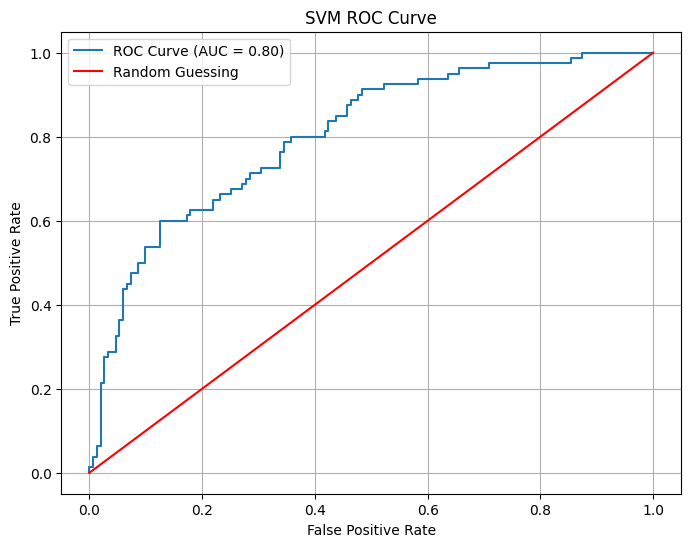

SVM ROC AUC:  0.8030629139072848


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Test verisi üzerinde tahminler yapalım
y_scores = grid_search_svm.best_estimator_.decision_function(X_test_scaled)

# ROC eğrisi oluşturulur
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC (Alan Altındaki Kareler) hesaplanır
auc = roc_auc_score(y_test, y_scores)

# ROC eğrisi çizilir
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

print("SVM ROC AUC: ", auc)

**YORUM**

**ROC AUC**

**Öncesi:** 0.7076572847682119

**Sonrası:** 0.8030629139072848

ROC AUC değerinde oldukça belirgin bir artış var (0.71'den 0.80'e). Bu, modelin pozitif sınıfı tanımadaki genel doğruluğunun önemli ölçüde arttığını gösterir.